******F20DL Coursework Part 1******

**Initialization of Required Libraries**

In [104]:
import sys
assert sys.version_info >= (3,5)

In [105]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [106]:
import pandas as pd

In [107]:
import numpy as np

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
from pandas.plotting import scatter_matrix

In [110]:
import time

In [111]:
import cv2

In [112]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [114]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [117]:
from sklearn.model_selection import cross_val_score

**Importing all coursework Datasets**

In [118]:
binary_class_x_train=pd.read_csv('./Traffic_Sign/Binary_Classification/x_train_bin.csv')
binary_class_y_train=pd.read_csv('./Traffic_Sign/Binary_Classification/y_train_bin.csv')
binary_class_x_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')
binary_class_y_test=pd.read_csv('./Traffic_Sign/Binary_Classification/y_test_bin.csv')

complete_x_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_train_all.csv')
complete_y_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_train_all.csv')
complete_x_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv')
complete_y_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_test_all.csv')

onevsall_y_train_0=pd.read_csv('./Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv')
onevsall_y_train_1=pd.read_csv('./Traffic_Sign/OnevrsAll/1_vrs_all/y_train_1.csv')
onevsall_y_train_2=pd.read_csv('./Traffic_Sign/OnevrsAll/2_vrs_all/y_train_2.csv')
onevsall_y_train_3=pd.read_csv('./Traffic_Sign/OnevrsAll/3_vrs_all/y_train_3.csv')
onevsall_y_train_4=pd.read_csv('./Traffic_Sign/OnevrsAll/4_vrs_all/y_train_4.csv')
onevsall_y_train_5=pd.read_csv('./Traffic_Sign/OnevrsAll/5_vrs_all/y_train_5.csv')
onevsall_y_train_6=pd.read_csv('./Traffic_Sign/OnevrsAll/6_vrs_all/y_train_6.csv')
onevsall_y_train_7=pd.read_csv('./Traffic_Sign/OnevrsAll/7_vrs_all/y_train_7.csv')
onevsall_y_train_8=pd.read_csv('./Traffic_Sign/OnevrsAll/8_vrs_all/y_train_8.csv')
onevsall_y_train_9=pd.read_csv('./Traffic_Sign/OnevrsAll/9_vrs_all/y_train_9.csv')

# Specs assumes 0 is true and 1 is false. So we have to reverse that

def inverse_num(i):
    if i == 1: return 0
    else: return 1

onevsall_y_train_0 = [[inverse_num(i)] for i in onevsall_y_train_0.copy().to_numpy()]
onevsall_y_train_1 = [[inverse_num(i)] for i in onevsall_y_train_1.copy().to_numpy()]
onevsall_y_train_2 = [[inverse_num(i)] for i in onevsall_y_train_2.copy().to_numpy()]
onevsall_y_train_3 = [[inverse_num(i)] for i in onevsall_y_train_3.copy().to_numpy()]
onevsall_y_train_4 = [[inverse_num(i)] for i in onevsall_y_train_4.copy().to_numpy()]
onevsall_y_train_5 = [[inverse_num(i)] for i in onevsall_y_train_5.copy().to_numpy()]
onevsall_y_train_6 = [[inverse_num(i)] for i in onevsall_y_train_6.copy().to_numpy()]
onevsall_y_train_7 = [[inverse_num(i)] for i in onevsall_y_train_7.copy().to_numpy()]
onevsall_y_train_8 = [[inverse_num(i)] for i in onevsall_y_train_8.copy().to_numpy()]
onevsall_y_train_9 = [[inverse_num(i)] for i in onevsall_y_train_9.copy().to_numpy()]

complete_x_train = complete_x_train.astype('float') / 255
complete_x_test = complete_x_test.astype('float') / 255

final_dataset = complete_x_train.copy()
final_dataset['class']=complete_y_train.copy()

**Task 1. Visualization and Initial Data Exploration**

Basic Description of x and y datasets

In [119]:
complete_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.305882,0.301961,0.298039,0.321569,0.341176,0.360784,0.407843,0.466667,0.458824,0.470588,...,0.341176,0.309804,0.282353,0.298039,0.325490,0.372549,0.388235,0.384314,0.372549,0.368627
1,0.286275,0.294118,0.309804,0.305882,0.298039,0.294118,0.349020,0.419608,0.521569,0.490196,...,0.376471,0.364706,0.333333,0.301961,0.270588,0.286275,0.325490,0.392157,0.396078,0.396078
2,0.282353,0.294118,0.309804,0.301961,0.317647,0.349020,0.411765,0.427451,0.337255,0.352941,...,0.384314,0.372549,0.345098,0.313725,0.286275,0.278431,0.290196,0.313725,0.349020,0.372549
3,0.262745,0.274510,0.290196,0.313725,0.364706,0.419608,0.431373,0.376471,0.270588,0.392157,...,0.439216,0.360784,0.341176,0.321569,0.301961,0.282353,0.274510,0.282353,0.317647,0.345098
4,0.290196,0.290196,0.286275,0.282353,0.301961,0.341176,0.407843,0.427451,0.329412,0.325490,...,0.392157,0.384314,0.388235,0.392157,0.388235,0.349020,0.305882,0.258824,0.266667,0.282353


In [120]:
complete_y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [121]:
complete_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000
mean,0.351602,0.351158,0.350368,0.351242,0.352206,0.352366,0.352483,0.352857,0.353609,0.354977,...,0.283274,0.281700,0.279977,0.276753,0.273177,0.270112,0.267822,0.266007,0.264895,0.264287
std,0.304005,0.303649,0.303335,0.303917,0.303676,0.303055,0.302297,0.302281,0.302205,0.302571,...,0.256349,0.256624,0.256480,0.255468,0.254455,0.253060,0.252057,0.250194,0.248773,0.249044
min,0.019608,0.019608,0.015686,0.019608,0.019608,0.019608,0.019608,0.015686,0.015686,0.015686,...,0.015686,0.015686,0.015686,0.019608,0.015686,0.015686,0.015686,0.019608,0.015686,0.015686
25%,0.125490,0.125490,0.125490,0.121569,0.125490,0.125490,0.125490,0.129412,0.129412,0.129412,...,0.101961,0.101961,0.101961,0.101961,0.101961,0.098039,0.098039,0.098039,0.098039,0.098039
50%,0.223529,0.227451,0.223529,0.227451,0.227451,0.227451,0.227451,0.227451,0.231373,0.231373,...,0.180392,0.180392,0.180392,0.176471,0.176471,0.172549,0.172549,0.168627,0.168627,0.168627
75%,0.494118,0.486275,0.481373,0.482353,0.490196,0.485294,0.486275,0.486275,0.486275,0.494118,...,0.372549,0.364706,0.356863,0.345098,0.337255,0.329412,0.321569,0.321569,0.317647,0.317647
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
complete_y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [123]:
complete_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [124]:
complete_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       9690 non-null   int64
dtypes: int64(1)
memory usage: 75.8 KB


In [125]:
complete_x_train.shape

(9690, 2304)

In [126]:
complete_y_train.shape

(9690, 1)

Visualisation of a single image

In [127]:
complete_x_train.iloc[0].to_numpy().reshape(48,48)

array([[0.30588235, 0.30196078, 0.29803922, ..., 0.26666667, 0.2627451 ,
        0.2627451 ],
       [0.31764706, 0.30980392, 0.30588235, ..., 0.28235294, 0.28235294,
        0.28235294],
       [0.32941176, 0.3254902 , 0.31764706, ..., 0.30196078, 0.30588235,
        0.30980392],
       ...,
       [0.38431373, 0.38823529, 0.39215686, ..., 0.42745098, 0.40784314,
        0.39607843],
       [0.35294118, 0.36862745, 0.39215686, ..., 0.40392157, 0.39215686,
        0.38039216],
       [0.33333333, 0.36078431, 0.4       , ..., 0.38431373, 0.37254902,
        0.36862745]])

In [128]:
def visualize_image(num):
    plt.imshow(complete_x_train.iloc[num].to_numpy().reshape(48,48),cmap="grey")

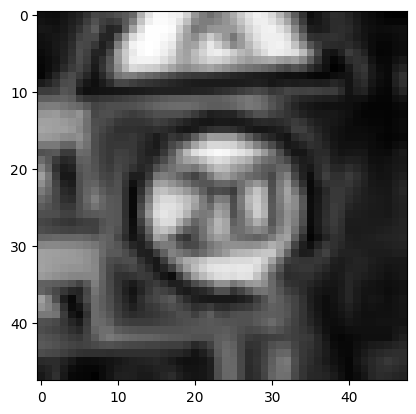

In [129]:
visualize_image(0)

Visualisation of an image from each class

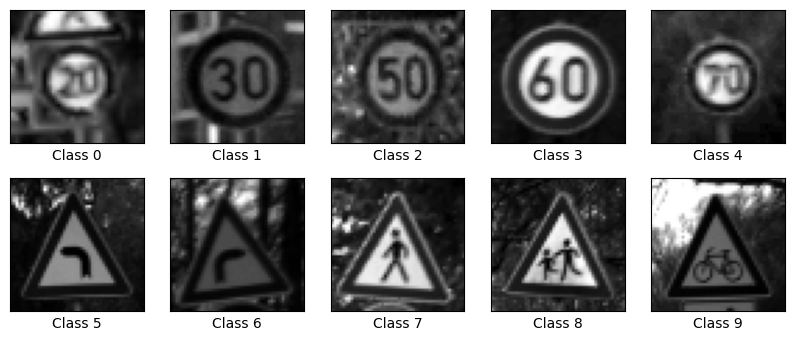

In [130]:
img_toshow = [0,210,2435,6085,7030,8275,8635,8875,9415,9685]

plt.figure(figsize=(10,4))

for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48), cmap='gray')
    plt.xlabel("Class "+str(complete_y_train.iloc[img_toshow[i]].to_numpy()[0]))

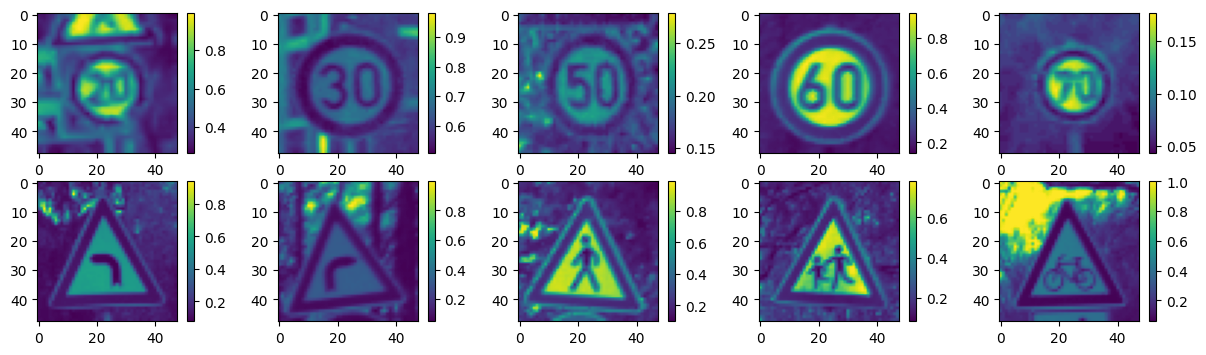

In [131]:
plt.figure(figsize=(15,4))
for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48))
    plt.colorbar()
    plt.grid(False)

Refining and balancing out the dataset to perform better

In [132]:
temp_dataset = final_dataset.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.6))

In [133]:
(temp_dataset['class'].value_counts()) / len(temp_dataset) * 100

class
2    23.219814
1    22.910217
4    20.433437
3    14.551084
8     5.572755
6     3.715170
9     2.786378
7     2.476780
0     2.167183
5     2.167183
Name: count, dtype: float64

In [134]:
min_val = temp_dataset['class'].value_counts().min()
# balanced_dataset = temp_dataset.groupby('class', group_keys=False).apply(lambda x: x.sample(min_val))
balanced_dataset = temp_dataset.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.9))
(balanced_dataset['class'].value_counts()) / len(balanced_dataset) * 100

class
2    23.222477
1    22.916667
4    20.431957
3    14.545107
8     5.581040
6     3.707951
9     2.790520
7     2.484709
0     2.159786
5     2.159786
Name: count, dtype: float64

In [135]:
balanced_dataset_x = balanced_dataset.iloc[:,:2304]
balanced_dataset_y = balanced_dataset.iloc[:,2304:]

Checking correlation with unbalanced and balanced datasets

In [136]:
# final_corr = final_dataset.corr()
# final_corr['class'].sort_values(ascending=False)[0:10]

In [137]:
# balanced_corr = balanced_dataset.corr()
# balanced_corr['class'].sort_values(ascending=False)[0:10]

**Naïve Bayes Classifier**

In [138]:
def init_train_classifier(classifier, dataset_train_x, dataset_train_y):
    clf = None
    if classifier == "gaussian":
        clf = GaussianNB()
    elif classifier == "multinomial":
        clf = MultinomialNB()
    elif classifier == "complement":
        clf = ComplementNB()
    elif classifier == "categorical":
        clf = CategoricalNB(min_categories=10)
    else:
        raise ValueError(f"Unknown classifier: {classifier}")
    clf.fit(dataset_train_x, dataset_train_y)
    return clf

def run_naivebayes_print(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    complete_y_pred = clf.predict(dataset_test_x)
    print("Accuracy:", accuracy_score(dataset_test_y, complete_y_pred))
    print("Precision: " , precision_score(dataset_test_y, complete_y_pred, average='weighted'))
    print('Recall score: ', recall_score(dataset_test_y, complete_y_pred, average='weighted'))
    print('F-measure: ', f1_score(dataset_test_y, complete_y_pred, average='weighted'))
    print(classification_report(dataset_test_y, complete_y_pred))
    conf_matrix = confusion_matrix(dataset_test_y, complete_y_pred)
    class_names = list(set(dataset_test_y) | set(complete_y_pred))
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    cm_display.plot()
    plt.show()
    y_score = clf.predict_proba(dataset_test_x)
    roc_auc = roc_auc_score(dataset_test_y, y_score, multi_class='ovr', average='weighted')
    print("ROC Area: ", roc_auc)

def run_naivebayes(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    complete_y_pred = clf.predict(dataset_test_x)
    ret_arr = [
        accuracy_score(dataset_test_y, complete_y_pred), 
        precision_score(dataset_test_y, complete_y_pred, average='weighted'), 
        recall_score(dataset_test_y, complete_y_pred, average='weighted'),
        f1_score(dataset_test_y, complete_y_pred, average='weighted'),
        classification_report(dataset_test_y, complete_y_pred),
        confusion_matrix(dataset_test_y, complete_y_pred)
    ]
    return ret_arr
    

Gaussian Naive Bayes Classifier using complete dataset

Accuracy: 0.1715210355987055
Precision:  0.36699901455553113
Recall score:  0.1715210355987055
F-measure:  0.22488545869568077
              precision    recall  f1-score   support

           0       0.01      0.05      0.02        60
           1       0.54      0.26      0.36       720
           2       0.42      0.16      0.23       750
           3       0.30      0.16      0.21       450
           4       0.26      0.07      0.11       660
           5       0.05      0.07      0.06        60
           6       0.00      0.02      0.00        90
           7       0.04      0.32      0.07        60
           8       0.67      0.44      0.53       150
           9       0.15      0.09      0.11        90

    accuracy                           0.17      3090
   macro avg       0.24      0.16      0.17      3090
weighted avg       0.37      0.17      0.22      3090



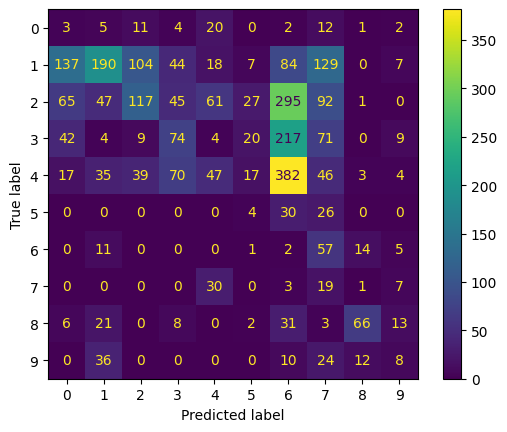

ROC Area:  0.6228585358879865


In [139]:
run_naivebayes_print("gaussian",complete_x_train,complete_y_train,complete_x_test,complete_y_test)

Multinomial Naive Bayes Classifier using complete dataset

Accuracy: 0.3275080906148867
Precision:  0.3506716138394717
Recall score:  0.3275080906148867
F-measure:  0.3246265314460128
              precision    recall  f1-score   support

           0       0.07      0.20      0.10        60
           1       0.36      0.19      0.25       720
           2       0.35      0.33      0.34       750
           3       0.31      0.37      0.34       450
           4       0.38      0.49      0.43       660
           5       0.19      0.50      0.28        60
           6       0.28      0.26      0.27        90
           7       0.47      0.40      0.43        60
           8       0.57      0.21      0.30       150
           9       0.19      0.17      0.18        90

    accuracy                           0.33      3090
   macro avg       0.32      0.31      0.29      3090
weighted avg       0.35      0.33      0.32      3090



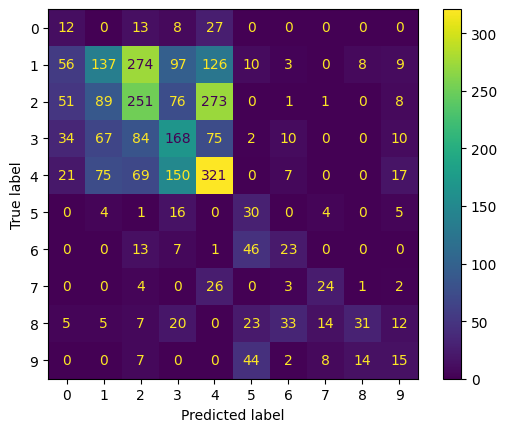

ROC Area:  0.6239739040219048


In [140]:
run_naivebayes_print("multinomial",complete_x_train,complete_y_train,complete_x_test,complete_y_test)

Complement Naive Bayes Classifier using complete dataset

Accuracy: 0.3446601941747573
Precision:  0.3641258905078335
Recall score:  0.3446601941747573
F-measure:  0.3083247767746972
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.44      0.17      0.24       720
           2       0.34      0.64      0.44       750
           3       0.24      0.53      0.33       450
           4       0.58      0.31      0.40       660
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        60
           8       0.42      0.13      0.19       150
           9       0.00      0.00      0.00        90

    accuracy                           0.34      3090
   macro avg       0.20      0.18      0.16      3090
weighted avg       0.36      0.34      0.31      3090



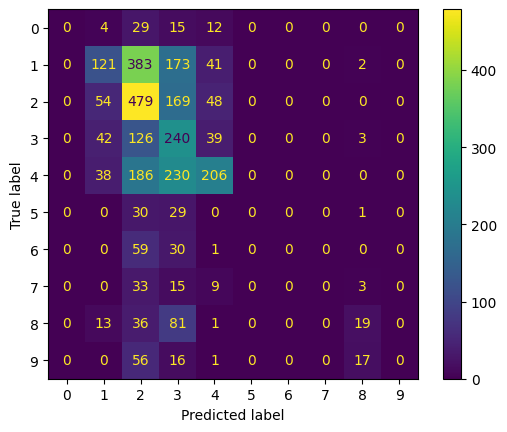

ROC Area:  0.5978690882432919


In [141]:
run_naivebayes_print("complement",complete_x_train,complete_y_train,complete_x_test,complete_y_test)

Categorical Naive Bayes Classifier using complete dataset

Accuracy: 0.27313915857605175
Precision:  0.35385801562317526
Recall score:  0.27313915857605175
F-measure:  0.20310141882622737
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.63      0.15      0.25       720
           2       0.37      0.07      0.12       750
           3       0.15      0.08      0.10       450
           4       0.26      0.93      0.40       660
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        60
           8       0.82      0.19      0.30       150
           9       0.00      0.00      0.00        90

    accuracy                           0.27      3090
   macro avg       0.22      0.14      0.12      3090
weighted avg       0.35      0.27      0.20      3090



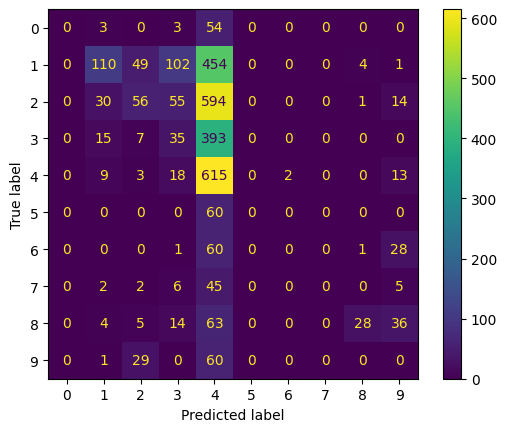

ROC Area:  0.5736767095610584


In [142]:
run_naivebayes_print("categorical",complete_x_train,complete_y_train,complete_x_test,complete_y_test)

Gaussian Naive Bayes Classifier using stratified dataset

Accuracy: 0.1673139158576052
Precision:  0.35977309114583156
Recall score:  0.1673139158576052
F-measure:  0.21875594767911113
              precision    recall  f1-score   support

           0       0.00      0.02      0.01        60
           1       0.58      0.22      0.32       720
           2       0.39      0.15      0.22       750
           3       0.31      0.17      0.22       450
           4       0.28      0.11      0.16       660
           5       0.00      0.00      0.00        60
           6       0.00      0.01      0.00        90
           7       0.04      0.32      0.07        60
           8       0.47      0.48      0.48       150
           9       0.08      0.06      0.07        90

    accuracy                           0.17      3090
   macro avg       0.22      0.15      0.15      3090
weighted avg       0.36      0.17      0.22      3090



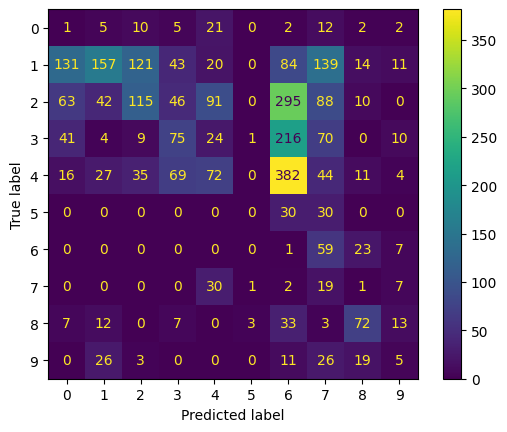

ROC Area:  0.6260562442745733


In [143]:
run_naivebayes_print("gaussian",balanced_dataset_x,balanced_dataset_y,complete_x_test,complete_y_test)

Multinomial Naive Bayes Classifier using stratified dataset

Accuracy: 0.3320388349514563
Precision:  0.35243329675154206
Recall score:  0.3320388349514563
F-measure:  0.3292118300516579
              precision    recall  f1-score   support

           0       0.05      0.15      0.08        60
           1       0.36      0.20      0.26       720
           2       0.34      0.34      0.34       750
           3       0.31      0.38      0.34       450
           4       0.38      0.48      0.43       660
           5       0.24      0.48      0.32        60
           6       0.29      0.30      0.29        90
           7       0.34      0.40      0.37        60
           8       0.61      0.22      0.32       150
           9       0.25      0.17      0.20        90

    accuracy                           0.33      3090
   macro avg       0.32      0.31      0.30      3090
weighted avg       0.35      0.33      0.33      3090



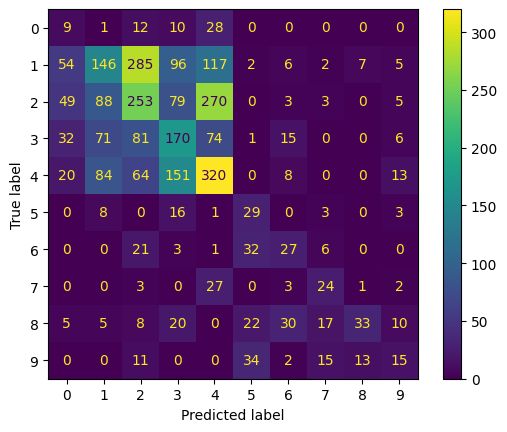

ROC Area:  0.6216216580371627


In [144]:
run_naivebayes_print("multinomial",balanced_dataset_x,balanced_dataset_y,complete_x_test,complete_y_test)

Complement Naive Bayes Classifier using stratified dataset

Accuracy: 0.33624595469255664
Precision:  0.3847080663386613
Recall score:  0.33624595469255664
F-measure:  0.29506621955385215
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.46      0.15      0.23       720
           2       0.33      0.67      0.44       750
           3       0.24      0.54      0.33       450
           4       0.65      0.24      0.36       660
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        60
           8       0.50      0.15      0.23       150
           9       0.00      0.00      0.00        90

    accuracy                           0.34      3090
   macro avg       0.22      0.18      0.16      3090
weighted avg       0.38      0.34      0.30      3090



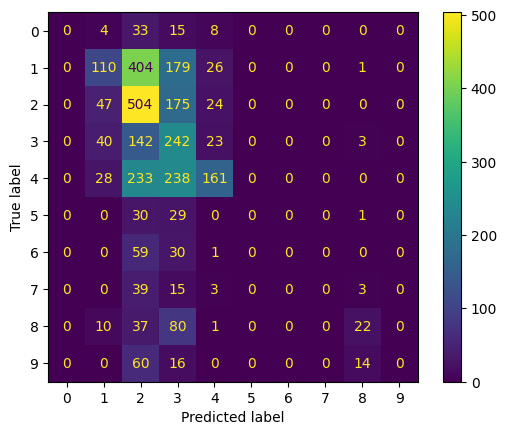

ROC Area:  0.5959846612132135


In [145]:
run_naivebayes_print("complement",balanced_dataset_x,balanced_dataset_y,complete_x_test,complete_y_test)

Categorical Naive Bayes Classifier using stratified dataset

Accuracy: 0.2627831715210356
Precision:  0.32186790281746586
Recall score:  0.2627831715210356
F-measure:  0.18688246188506483
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.56      0.10      0.18       720
           2       0.29      0.07      0.12       750
           3       0.15      0.08      0.10       450
           4       0.26      0.93      0.40       660
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        60
           8       0.91      0.21      0.35       150
           9       0.00      0.00      0.00        90

    accuracy                           0.26      3090
   macro avg       0.22      0.14      0.11      3090
weighted avg       0.32      0.26      0.19      3090



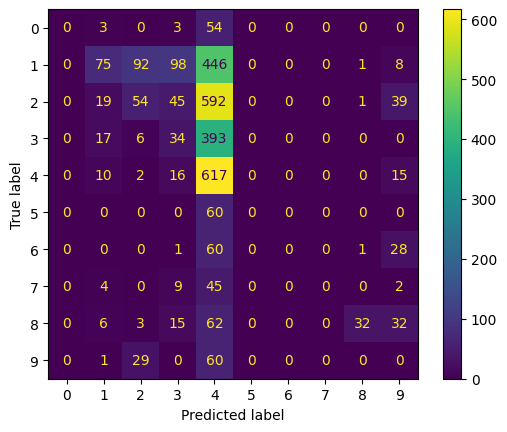

ROC Area:  0.5729250165186736


In [146]:
run_naivebayes_print("categorical",balanced_dataset_x,balanced_dataset_y,complete_x_test,complete_y_test)

Getting Dataset using PCA

In [147]:
from sklearn.decomposition import PCA 
n_samples, n_features = balanced_dataset_x.shape
n_components = min(n_samples, n_features) - 1

pca = PCA(n_components=n_components)
X2D = pca.fit_transform(balanced_dataset_x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [148]:
pca = PCA(n_components = d)
X_reduced = pd.DataFrame(pca.fit_transform(balanced_dataset_x))

In [149]:
pca_dataset_x = pd.DataFrame(pca.inverse_transform(X_reduced))
pca_dataset_x[pca_dataset_x < 0] = 0
pca_dataset_y = balanced_dataset_y.copy()

Gaussian Naive Bayes Classifier using PCA recovered dataset

Accuracy: 0.16763754045307444
Precision:  0.3507680433657996
Recall score:  0.16763754045307444
F-measure:  0.21794052513097842
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.56      0.23      0.33       720
           2       0.38      0.16      0.22       750
           3       0.30      0.16      0.21       450
           4       0.26      0.09      0.14       660
           5       0.09      0.02      0.03        60
           6       0.00      0.00      0.00        90
           7       0.04      0.32      0.07        60
           8       0.47      0.48      0.47       150
           9       0.07      0.04      0.05        90

    accuracy                           0.17      3090
   macro avg       0.22      0.15      0.15      3090
weighted avg       0.35      0.17      0.22      3090



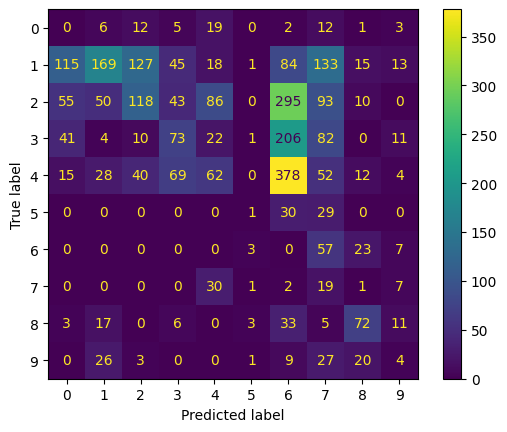

ROC Area:  0.6274984522582437


In [150]:
run_naivebayes_print("gaussian",pca_dataset_x,pca_dataset_y,complete_x_test,complete_y_test)

Multinomial Naive Bayes Classifier using PCA recovered dataset

Accuracy: 0.32362459546925565
Precision:  0.34667684614248107
Recall score:  0.32362459546925565
F-measure:  0.32123057940636246
              precision    recall  f1-score   support

           0       0.05      0.15      0.07        60
           1       0.36      0.19      0.25       720
           2       0.34      0.33      0.34       750
           3       0.31      0.38      0.34       450
           4       0.38      0.47      0.42       660
           5       0.21      0.48      0.29        60
           6       0.24      0.27      0.25        90
           7       0.39      0.40      0.39        60
           8       0.58      0.19      0.29       150
           9       0.22      0.18      0.20        90

    accuracy                           0.32      3090
   macro avg       0.31      0.30      0.28      3090
weighted avg       0.35      0.32      0.32      3090



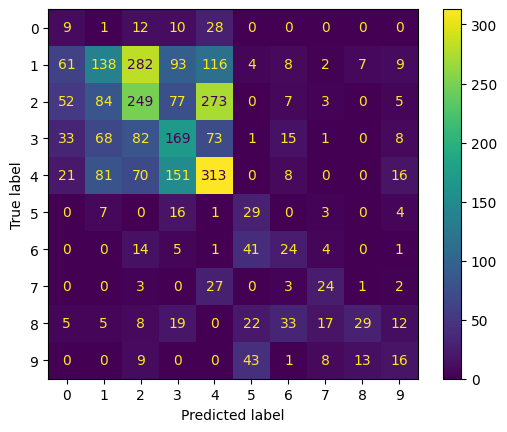

ROC Area:  0.6185072385016422


In [151]:
run_naivebayes_print("multinomial",pca_dataset_x,pca_dataset_y,complete_x_test,complete_y_test)

Complement Naive Bayes Classifier using PCA recovered dataset

Accuracy: 0.3313915857605178
Precision:  0.37534093466329926
Recall score:  0.3313915857605178
F-measure:  0.28927834044710754
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.46      0.15      0.23       720
           2       0.33      0.67      0.44       750
           3       0.24      0.53      0.33       450
           4       0.61      0.23      0.33       660
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        60
           8       0.50      0.14      0.22       150
           9       0.00      0.00      0.00        90

    accuracy                           0.33      3090
   macro avg       0.21      0.17      0.15      3090
weighted avg       0.38      0.33      0.29      3090



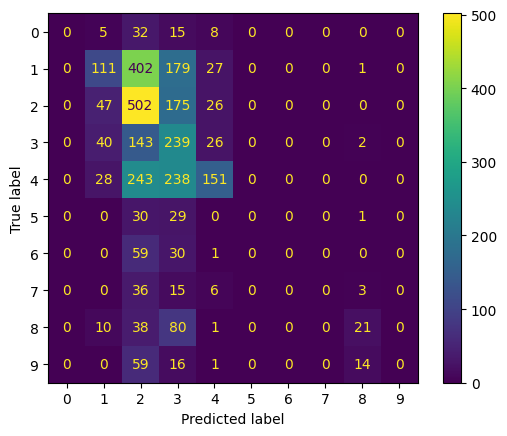

ROC Area:  0.5935175087279665


In [152]:
run_naivebayes_print("complement",pca_dataset_x,pca_dataset_y,complete_x_test,complete_y_test)

Categorical Naive Bayes Classifier using PCA recovered dataset

Accuracy: 0.2728155339805825
Precision:  0.3594365391685617
Recall score:  0.2728155339805825
F-measure:  0.2054435060540119
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.63      0.14      0.23       720
           2       0.39      0.10      0.15       750
           3       0.15      0.08      0.11       450
           4       0.26      0.93      0.41       660
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        60
           8       0.80      0.13      0.23       150
           9       0.00      0.00      0.00        90

    accuracy                           0.27      3090
   macro avg       0.22      0.14      0.11      3090
weighted avg       0.36      0.27      0.21      3090



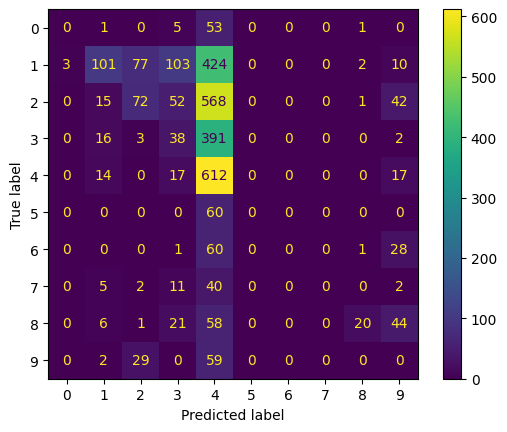

ROC Area:  0.568474471109431


In [153]:
run_naivebayes_print("categorical",pca_dataset_x,pca_dataset_y,complete_x_test,complete_y_test)

**Selecting best correlating features**

Methods to select the top correlating features

In [154]:
class_arr_data = [
                onevsall_y_train_0.copy(),
                onevsall_y_train_1.copy(),
                onevsall_y_train_2.copy(),
                onevsall_y_train_3.copy(),
                onevsall_y_train_4.copy(),
                onevsall_y_train_5.copy(),
                onevsall_y_train_6.copy(),
                onevsall_y_train_7.copy(),
                onevsall_y_train_8.copy(),
                onevsall_y_train_9.copy()
            ]

x_data = complete_x_train.copy()

In [155]:
def getTopFeatureMethod1(x,dataset,arr):
    return_arr = []
    for i in arr:
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(arr))
        fit = bestfeatures.fit(dataset,i)
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(dataset.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        return_arr = np.unique(np.concatenate((return_arr,featureScores.nlargest(x//len(arr),'Score')['Specs']),0))
    return return_arr

In [156]:
def getTopFeatureMethod2(x,dataset,arr):
    features_array = [[]]*10
    return_arr = [[]]*3
    for i in range (0,len(arr)):
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(arr))
        fit = bestfeatures.fit(dataset,arr[i])
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(dataset.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        features_array[i]=featureScores.nlargest(x//len(arr),'Score')['Specs']
    for i in range (0,10):
        return_arr[0] = np.unique(np.concatenate((return_arr[0], features_array[i][0:x//len(arr)]),0))
        return_arr[1] = np.unique(np.concatenate((return_arr[1], features_array[i][0:x//(len(arr)*2)]),0))
        return_arr[2] = np.unique(np.concatenate((return_arr[2], features_array[i][0:x//(len(arr)*4)]),0))
    return return_arr

In [157]:
start_time = time.time()
temp1 = getTopFeatureMethod1(300,x_data,class_arr_data)
temp2 = getTopFeatureMethod1(150,x_data,class_arr_data)
temp3 = getTopFeatureMethod1(75,x_data,class_arr_data)
print("Time taken to compute best features using method 1 : ",time.time()-start_time)

start_time = time.time()
temp = getTopFeatureMethod2(200,x_data,class_arr_data)
print("Time taken to compute best features using method 2 : ",time.time()-start_time)

Time taken to compute best features using method 1 :  1.9379949569702148
Time taken to compute best features using method 2 :  0.7198290824890137


In [158]:
dataset1_method_1 = balanced_dataset_x.copy()[temp1]
dataset2_method_1 = balanced_dataset_x.copy()[temp2]
dataset3_method_1 = balanced_dataset_x.copy()[temp3]

dataset1_method_2 = balanced_dataset_x.copy()[temp[0]]
dataset2_method_2 = balanced_dataset_x.copy()[temp[1]]
dataset3_method_2 = balanced_dataset_x.copy()[temp[2]]

dataset1_test_method_1 = complete_x_test.copy()[temp1]
dataset2_test_method_1 = complete_x_test.copy()[temp2]
dataset3_test_method_1 = complete_x_test.copy()[temp3]

dataset1_test_method_2 = complete_x_test.copy()[temp[0]]
dataset2_test_method_2 = complete_x_test.copy()[temp[1]]
dataset3_test_method_2 = complete_x_test.copy()[temp[2]]

**Running Naïve Bayes Classifier on the datasets produced by running the methods mentioned in above section**

In [159]:
datasets = [
    [(dataset1_method_1, dataset1_test_method_1), (dataset2_method_1, dataset2_test_method_1), (dataset3_method_1, dataset3_test_method_1)],
    [(dataset1_method_2, dataset1_test_method_2), (dataset2_method_2, dataset2_test_method_2), (dataset3_method_2, dataset3_test_method_2)]
]

bayes = ["gaussian", "multinomial", "complement"]

for i in range (0,len(datasets)):
    print("*"*100)
    print("Using Method ",i+1)
    print("*"*100)
    for j in range (0,len(datasets[i])):
        for k in range (0,len(bayes)):
            temp = run_naivebayes(bayes[k], datasets[i][j][0], balanced_dataset_y, datasets[i][j][1], complete_y_test)
            print("Dataset",i+1,"\tMethod",j+1,"\t",bayes[k].capitalize(),"Naive Bayes  ","\tAccuracy :",temp[0],"\tPrecision :",temp[1],"  \tRecall Score :",temp[2],"\tF1 Score :",temp[3])

****************************************************************************************************
Using Method  1
****************************************************************************************************
Dataset 1 	Method 1 	 Gaussian Naive Bayes   	Accuracy : 0.26181229773462783 	Precision : 0.4385732632972109   	Recall Score : 0.26181229773462783 	F1 Score : 0.3058334505404464
Dataset 1 	Method 1 	 Multinomial Naive Bayes   	Accuracy : 0.45728155339805826 	Precision : 0.4637336583337408   	Recall Score : 0.45728155339805826 	F1 Score : 0.45450322578477514
Dataset 1 	Method 1 	 Complement Naive Bayes   	Accuracy : 0.49223300970873785 	Precision : 0.5033973210193848   	Recall Score : 0.49223300970873785 	F1 Score : 0.47314049615402765
Dataset 1 	Method 2 	 Gaussian Naive Bayes   	Accuracy : 0.2822006472491909 	Precision : 0.4443110573167337   	Recall Score : 0.2822006472491909 	F1 Score : 0.3223609785196546
Dataset 1 	Method 2 	 Multinomial Naive Bayes   	Accuracy : 0.463

In [160]:
x_train_sm = np.apply_along_axis(
    func1d=lambda img: cv2.resize(img.reshape(48, 48), dsize=(30,30)),
    axis=1, arr=balanced_dataset_x).reshape(-1, 30*30)

x_train_sm = pd.DataFrame(x_train_sm)

x_test_sm = np.apply_along_axis(
    func1d=lambda img: cv2.resize(img.reshape(48, 48), dsize=(30,30)),
    axis=1, arr=complete_x_test).reshape(-1, 30*30) 

x_test_sm = pd.DataFrame(x_test_sm)


temp = run_naivebayes("gaussian", x_train_sm, balanced_dataset_y, x_test_sm, complete_y_test)
print("Gaussian Naive Bayes  ","  \tAccuracy :",temp[0],"\tPrecision :",temp[1],"  \tRecall Score :",temp[2],"\tF1 Score :",temp[3])

temp = run_naivebayes("multinomial", x_train_sm, balanced_dataset_y, x_test_sm, complete_y_test)
print("Multinomial Naive Bayes  ","  \tAccuracy :",temp[0],"\tPrecision :",temp[1],"  \tRecall Score :",temp[2],"\tF1 Score :",temp[3])

temp = run_naivebayes("complement", x_train_sm, balanced_dataset_y, x_test_sm, complete_y_test)
print("Complement Naive Bayes  ","  \tAccuracy :",temp[0],"\tPrecision :",temp[1],"  \tRecall Score :",temp[2],"\tF1 Score :",temp[3])

temp = run_naivebayes("categorical", x_train_sm, balanced_dataset_y, x_test_sm, complete_y_test)
print("Categorical Naive Bayes  ","  \tAccuracy :",temp[0],"\tPrecision :",temp[1],"  \tRecall Score :",temp[2],"\tF1 Score :",temp[3])

Gaussian Naive Bayes     	Accuracy : 0.16537216828478965 	Precision : 0.3559049599660799   	Recall Score : 0.16537216828478965 	F1 Score : 0.21666030276291873
Multinomial Naive Bayes     	Accuracy : 0.32815533980582523 	Precision : 0.3415662844173915   	Recall Score : 0.32815533980582523 	F1 Score : 0.32418491310295977
Complement Naive Bayes     	Accuracy : 0.3294498381877023 	Precision : 0.3780158438178476   	Recall Score : 0.3294498381877023 	F1 Score : 0.28449327771305444
Categorical Naive Bayes     	Accuracy : 0.26601941747572816 	Precision : 0.35147811415043756   	Recall Score : 0.26601941747572816 	F1 Score : 0.19101821414208472


In [161]:
class_arr_data1 = [balanced_dataset_y.copy(),
                  balanced_dataset_y.copy(),
                  balanced_dataset_y.copy(),
                  balanced_dataset_y.copy(),
                  balanced_dataset_y.copy(),
                  balanced_dataset_y.copy(),
                  balanced_dataset_y.copy(),
                  balanced_dataset_y.copy(),
                  balanced_dataset_y.copy(),
                  balanced_dataset_y.copy()]

class_arr_data1[0]=class_arr_data1[0].replace({'class':{0:1,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}})
class_arr_data1[1]=class_arr_data1[1].replace({'class':{0:0,1:1,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}})
class_arr_data1[2]=class_arr_data1[2].replace({'class':{0:0,1:0,2:1,3:0,4:0,5:0,6:0,7:0,8:0,9:0}})
class_arr_data1[3]=class_arr_data1[3].replace({'class':{0:0,1:0,2:0,3:1,4:0,5:0,6:0,7:0,8:0,9:0}})
class_arr_data1[4]=class_arr_data1[4].replace({'class':{0:0,1:0,2:0,3:0,4:1,5:0,6:0,7:0,8:0,9:0}})
class_arr_data1[5]=class_arr_data1[5].replace({'class':{0:0,1:0,2:0,3:0,4:0,5:1,6:0,7:0,8:0,9:0}})
class_arr_data1[6]=class_arr_data1[6].replace({'class':{0:0,1:0,2:0,3:0,4:0,5:0,6:1,7:0,8:0,9:0}})
class_arr_data1[7]=class_arr_data1[7].replace({'class':{0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:1,8:0,9:0}})
class_arr_data1[8]=class_arr_data1[8].replace({'class':{0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:1,9:0}})
class_arr_data1[9]=class_arr_data1[9].replace({'class':{0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:1}})

start_time = time.time()
temp1 = getTopFeatureMethod1(300,x_train_sm,class_arr_data1)
temp2 = getTopFeatureMethod1(150,x_train_sm,class_arr_data1)
temp3 = getTopFeatureMethod1(75,x_train_sm,class_arr_data1)
print("Time taken to compute best features using method 1 : ",time.time()-start_time)

start_time = time.time()
temp = getTopFeatureMethod2(200,x_train_sm,class_arr_data1)
print("Time taken to compute best features using method 2 : ",time.time()-start_time)

Time taken to compute best features using method 1 :  0.6171159744262695
Time taken to compute best features using method 2 :  0.14293408393859863


In [162]:
temp[0] = [int(i) for i in temp[0]]
temp[1] = [int(i) for i in temp[1]]
temp[2] = [int(i) for i in temp[2]]

temp1 = [int(i) for i in temp1]
temp2 = [int(i) for i in temp2]
temp3 = [int(i) for i in temp3]

dataset1_method_1 = x_train_sm.copy()[temp1]
dataset2_method_1 = x_train_sm.copy()[temp2]
dataset3_method_1 = x_train_sm.copy()[temp3]

dataset1_method_2 = x_train_sm.copy()[temp[0]]
dataset2_method_2 = x_train_sm.copy()[temp[1]]
dataset3_method_2 = x_train_sm.copy()[temp[2]]

dataset1_test_method_1 = x_test_sm.copy()[temp1]
dataset2_test_method_1 = x_test_sm.copy()[temp2]
dataset3_test_method_1 = x_test_sm.copy()[temp3]

dataset1_test_method_2 = x_test_sm.copy()[temp[0]]
dataset2_test_method_2 = x_test_sm.copy()[temp[1]]
dataset3_test_method_2 = x_test_sm.copy()[temp[2]]

In [163]:
datasets = [
    [(dataset1_method_1, dataset1_test_method_1), (dataset2_method_1, dataset2_test_method_1), (dataset3_method_1, dataset3_test_method_1)],
    [(dataset1_method_2, dataset1_test_method_2), (dataset2_method_2, dataset2_test_method_2), (dataset3_method_2, dataset3_test_method_2)]
]

bayes = ["gaussian", "multinomial", "complement"]

for i in range (0,len(datasets)):
    print("*"*100)
    print("Using Method ",i+1)
    print("*"*100)
    for j in range (0,len(datasets[i])):
        for k in range (0,len(bayes)):
            temp = run_naivebayes(bayes[k], datasets[i][j][0], balanced_dataset_y, datasets[i][j][1], complete_y_test)
            print("Dataset",i+1,"\tMethod",j+1,"\t",bayes[k].capitalize(),"Naive Bayes  ","\tAccuracy :",temp[0],"\tPrecision :",temp[1],"  \tRecall Score :",temp[2],"\tF1 Score :",temp[3])

****************************************************************************************************
Using Method  1
****************************************************************************************************
Dataset 1 	Method 1 	 Gaussian Naive Bayes   	Accuracy : 0.22427184466019418 	Precision : 0.3768915964164122   	Recall Score : 0.22427184466019418 	F1 Score : 0.25906974572718466
Dataset 1 	Method 1 	 Multinomial Naive Bayes   	Accuracy : 0.37605177993527505 	Precision : 0.375788782094831   	Recall Score : 0.37605177993527505 	F1 Score : 0.36871362482978337
Dataset 1 	Method 1 	 Complement Naive Bayes   	Accuracy : 0.4355987055016181 	Precision : 0.4246720662981595   	Recall Score : 0.4355987055016181 	F1 Score : 0.4098520708083258
Dataset 1 	Method 2 	 Gaussian Naive Bayes   	Accuracy : 0.25954692556634307 	Precision : 0.4146235349512655   	Recall Score : 0.25954692556634307 	F1 Score : 0.2971234823904316
Dataset 1 	Method 2 	 Multinomial Naive Bayes   	Accuracy : 0.3977